# **Preparation**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

base_path = '/content/gdrive/MyDrive/CV_Assignment3/'

Mounted at /content/gdrive/


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.getlimits import inf
import sys
C0 = 1
Sigma = 2

In [ ]:
img1_right = cv2.imread(base_path + 'r1.png', 0)

img1_left = cv2.imread(base_path + 'l1.png', 0)

img2_right = cv2.imread(base_path + 'r2.png', 0)

img2_left = cv2.imread(base_path + 'l2.png', 0)

img3_right = cv2.imread(base_path + 'r3.png', 0)

img3_left = cv2.imread(base_path + 'l3.png', 0)

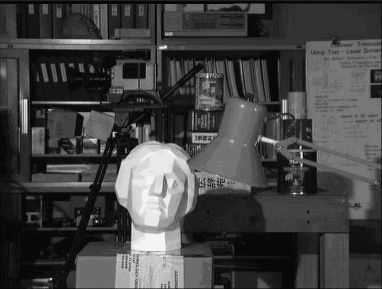

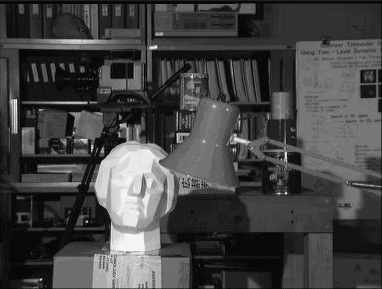

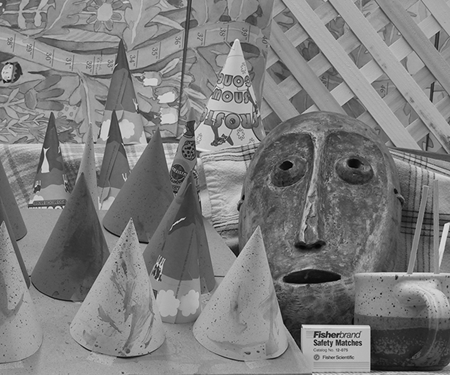

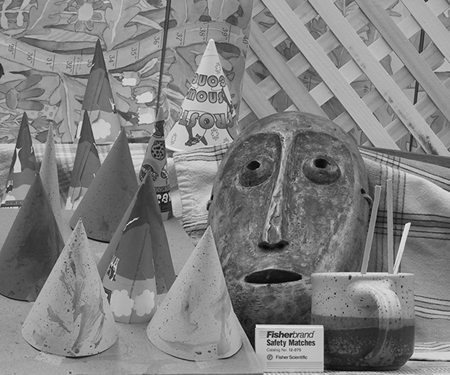

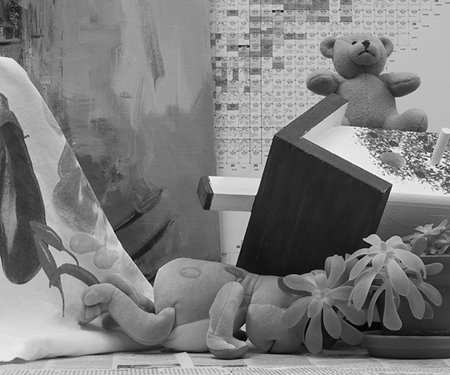

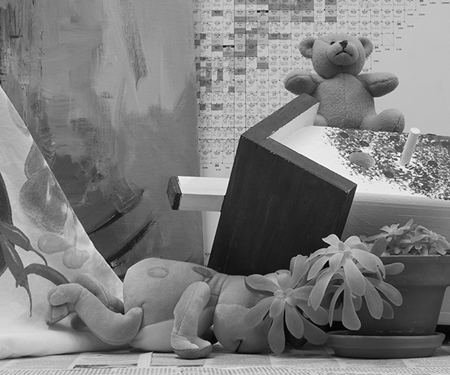

In [ ]:
cv2_imshow(img1_left)
cv2_imshow(img1_right)
cv2_imshow(img2_left)
cv2_imshow(img2_right)
cv2_imshow(img3_left)
cv2_imshow(img3_right)

# **Block Matching Approach**

In [ ]:
def calc_sad(left_win,right_win):
  return np.sum(np.abs(np.subtract(left_win,right_win)))
def calc_ssd(left_win,right_win):
   return np.sum(np.square(np.subtract(left_win,right_win)))

In [ ]:
def block_matching(left_img,right_img,window_size,cost):
  disparity_array=np.zeros((left_img.shape[0],left_img.shape[1]))
  rows=left_img.shape[0]
  cols=left_img.shape[1]

  print(left_img.shape[:2])
  half_wind=window_size//2
  #loop over windows
  min_col=0
  for row in range(half_wind,rows-half_wind):
    for col in range(half_wind,cols-half_wind):
      min_d=float("inf")
      leftimg_window=left_img[row-half_wind:row+half_wind+1,col-half_wind:col+half_wind+1]
      #looping through window size columns in right img
      for rightimg_col in range (half_wind,col-half_wind):
        right_window=right_img[row-half_wind:row+half_wind+1,rightimg_col-half_wind:rightimg_col+half_wind+1]
        if (measure=="SSD"):
          curr_d=calc_ssd(leftimg_window,right_window)
        else :
          curr_d=calc_sad(leftimg_window,right_window)
        if curr_d < min_d:
          min_d = curr_d
          min_col= rightimg_col
      disparity_array[row,col]=np.abs(col - min_col)
  return disparity_array







# **Test Cases**

First image :
window size is 1  cost using  SSD
(289, 382)


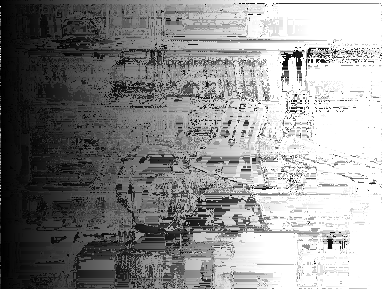

window size is 1  cost using  SAD
(289, 382)


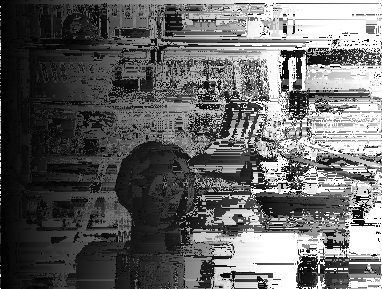

window size is 5  cost using  SSD
(289, 382)


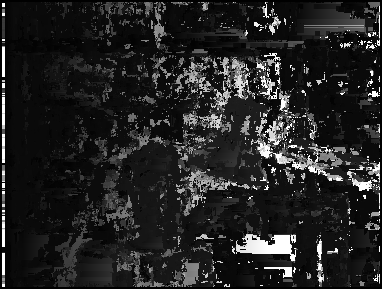

window size is 5  cost using  SAD
(289, 382)


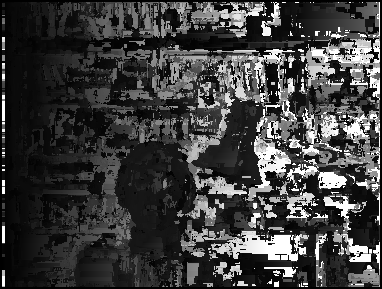

window size is 9  cost using  SSD
(289, 382)


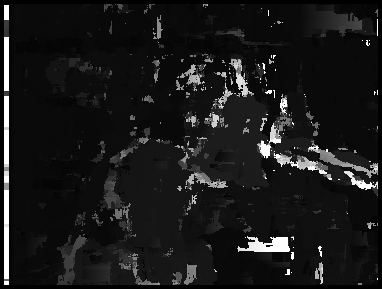

window size is 9  cost using  SAD
(289, 382)


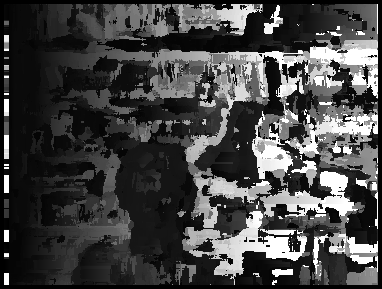

In [ ]:
print("First image :")
for w in [1,5,9]:
  for measure in ["SSD","SAD"]:
    print("window size is",w," cost using ",measure)
    cv2_imshow(block_matching(img1_left,img1_right,w,measure))


Secons image :
window size is 1  cost using  SSD
(375, 450)


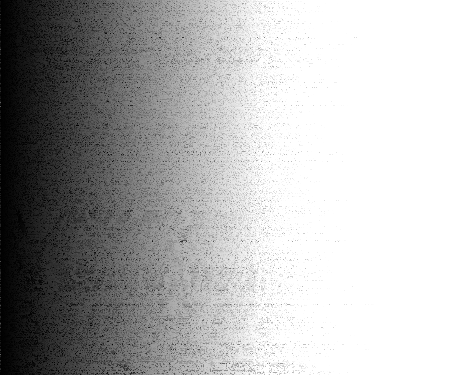

window size is 1  cost using  SAD
(375, 450)


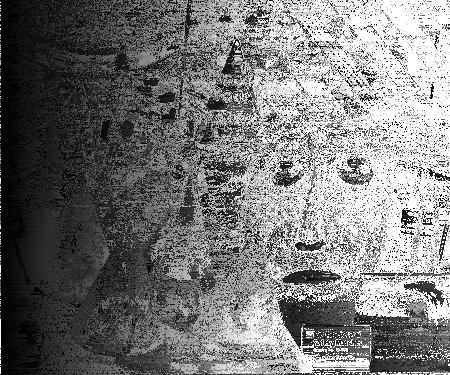

window size is 5  cost using  SSD
(375, 450)


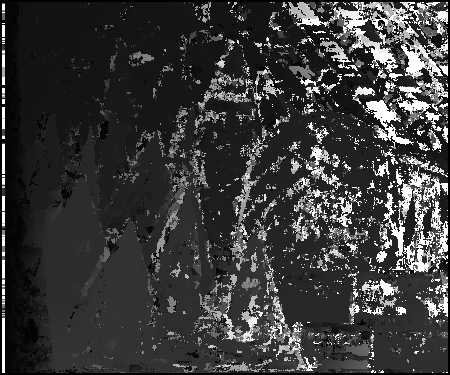

window size is 5  cost using  SAD
(375, 450)


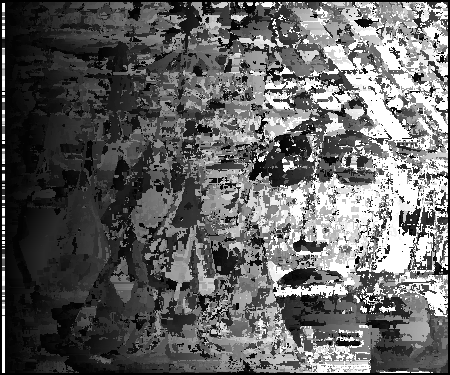

window size is 9  cost using  SSD
(375, 450)


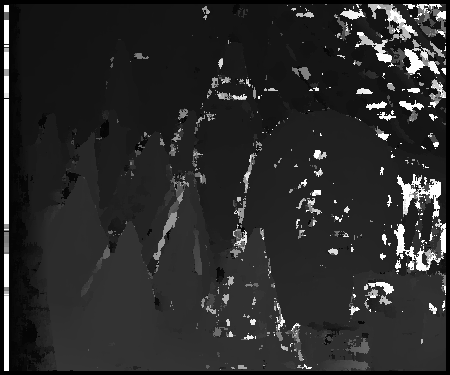

window size is 9  cost using  SAD
(375, 450)


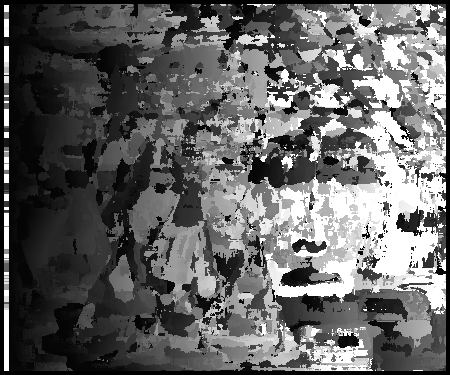

In [ ]:
print("Secons image :")
for w in [1,5,9]:
  for measure in ["SSD","SAD"]:
    print("window size is",w," cost using ",measure)
    cv2_imshow(block_matching(img2_left,img2_right,w,measure))


third image :
window size is 1  cost using  SSD
(375, 450)


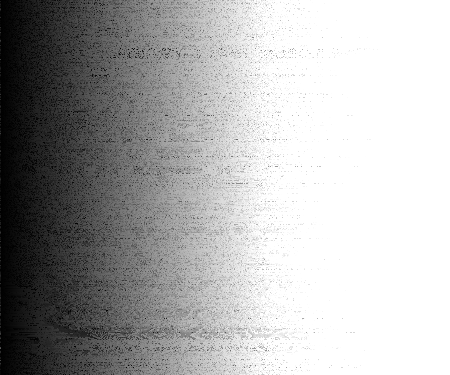

window size is 1  cost using  SAD
(375, 450)


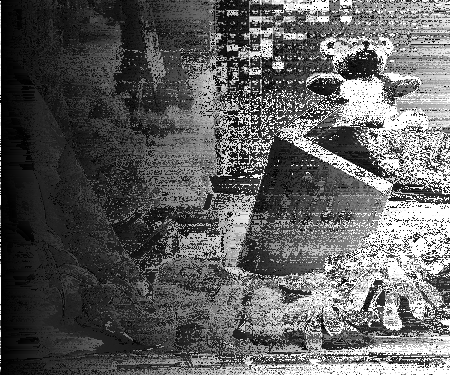

window size is 5  cost using  SSD
(375, 450)


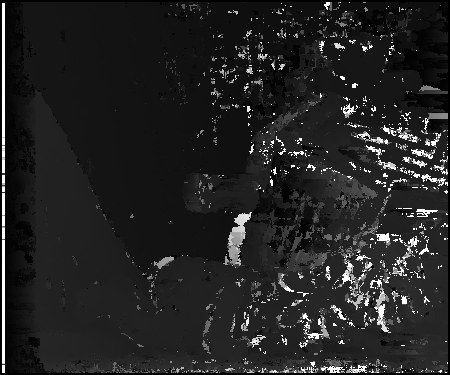

window size is 5  cost using  SAD
(375, 450)


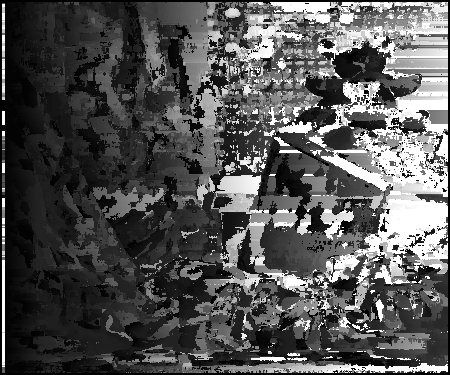

window size is 9  cost using  SSD
(375, 450)


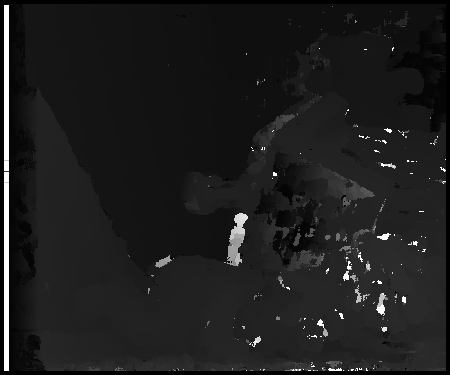

window size is 9  cost using  SAD
(375, 450)


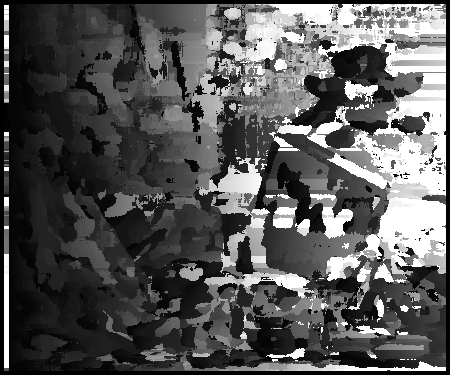

In [ ]:
print("third image :")
for w in [1,5,9]:
  for measure in ["SSD","SAD"]:
    print("window size is",w," cost using ",measure)
    cv2_imshow(block_matching(img3_left,img3_right,w,measure))

# **Dynamic Programming Approach**

In [ ]:
def cost_function(val_1, val_2):

  return ((val_1 - val_2)**2) / (Sigma**2)

In [ ]:
def calculate_scan_line_cost(left_scan_line,right_scan_line,i,j,cost_matrix):

  if cost_matrix[i, j] != np.inf:
    return cost_matrix[i, j]

  if i == 0 and j == 0:
    return cost_function(left_scan_line[0], right_scan_line[0])

  if i == 0:
    cost_matrix[i, j] = calculate_scan_line_cost(left_scan_line, right_scan_line, i, j - 1, cost_matrix) + C0
    return cost_matrix[i, j]

  if j == 0:
    cost_matrix[i, j] = calculate_scan_line_cost(left_scan_line, right_scan_line, i - 1, j, cost_matrix) + C0
    return cost_matrix[i, j]

  cost_matrix[i, j] = min(calculate_scan_line_cost(left_scan_line, right_scan_line, i - 1, j - 1, cost_matrix) + cost_function(left_scan_line[i], right_scan_line[j]) ,
                          calculate_scan_line_cost(left_scan_line, right_scan_line, i - 1, j, cost_matrix) + C0,
                          calculate_scan_line_cost(left_scan_line, right_scan_line, i, j - 1, cost_matrix) + C0)
  return cost_matrix[i, j]


In [ ]:
def calculate_disparity_map(cost_matrix, graph):

  width = np.shape(cost_matrix)[0]
  left_disparity = np.zeros((width, 1))
  right_disparity = np.zeros((width, 1))

  i = j = width - 1

  while i != 0 and j != 0:

    min_cost = min(cost_matrix[i - 1, j - 1], cost_matrix[i - 1, j], cost_matrix[i, j - 1])

    if min_cost == cost_matrix[i - 1, j - 1]:
      left_disparity[i] = right_disparity[j] = np.abs(i - j)
      graph[i - 1, j - 1] = 255
      i -= 1
      j -= 1


    elif min_cost == cost_matrix[i - 1, j] :
      graph[i - 1, j] = 255
      i = i - 1

    elif min_cost == cost_matrix[i, j - 1] :
      graph[i, j - 1] = 255
      j = j - 1

  return left_disparity, right_disparity

In [ ]:
def calculate_overall_disparity(left_img, right_img):

  left_map = []
  right_map = []
  rows, columns = left_img.shape[0], left_img.shape[1]


  for i in range (rows):
    graph = np.zeros((columns, columns))
    cost_matrix = np.full((columns, columns), np.inf)
    calculate_scan_line_cost(left_img[i], right_img[i], columns - 1, columns - 1, cost_matrix)
    left_disparity, right_disparity = calculate_disparity_map(cost_matrix, graph)
    left_map.append(left_disparity)
    right_map.append(right_disparity)


  normalized_left_map = np.array(left_map) * (255 / np.max(left_map))
  normalized_right_map = np.array(right_map) * (255 / np.max(right_map))

  return normalized_left_map, normalized_right_map, graph


# **Test Cases**

<ipython-input-5-ad4dbd5df7b7>:3: RuntimeWarning: overflow encountered in ubyte_scalars
  return ((val_1 - val_2)**2) / (Sigma**2)


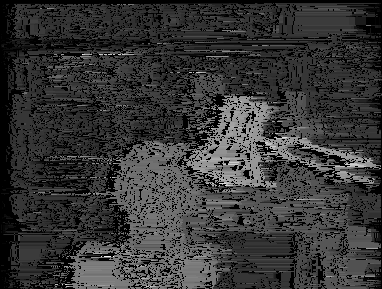

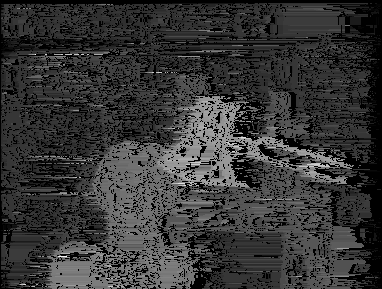

In [ ]:
left_map_1, right_map_1, graph = calculate_overall_disparity(img1_left, img1_right)

cv2_imshow(left_map_1)
cv2_imshow(right_map_1)

<ipython-input-5-ad4dbd5df7b7>:3: RuntimeWarning: overflow encountered in ubyte_scalars
  return ((val_1 - val_2)**2) / (Sigma**2)


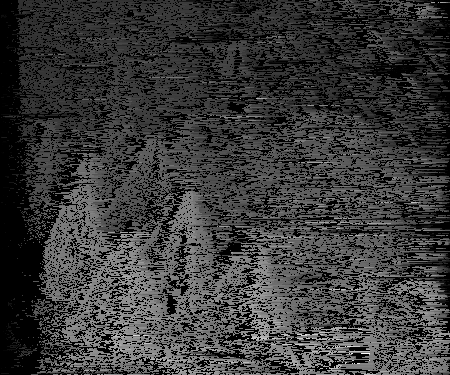

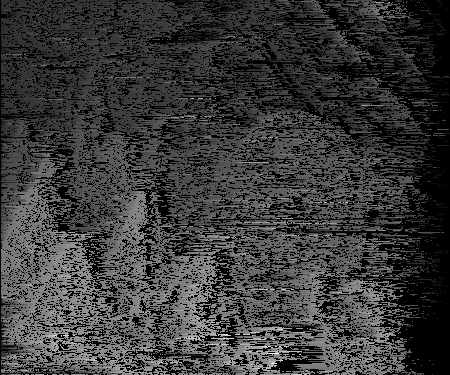

In [ ]:
left_map_2, right_map_2, graph_2 = calculate_overall_disparity(img2_left, img2_right)

cv2_imshow(left_map_2)
cv2_imshow(right_map_2)

<ipython-input-5-ad4dbd5df7b7>:3: RuntimeWarning: overflow encountered in ubyte_scalars
  return ((val_1 - val_2)**2) / (Sigma**2)


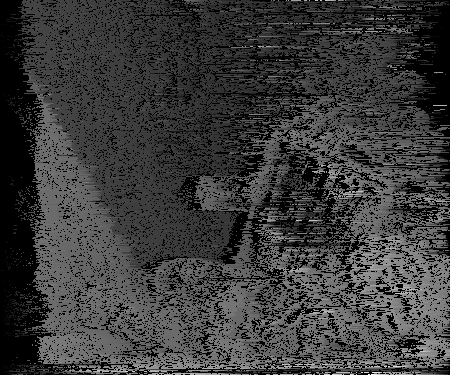

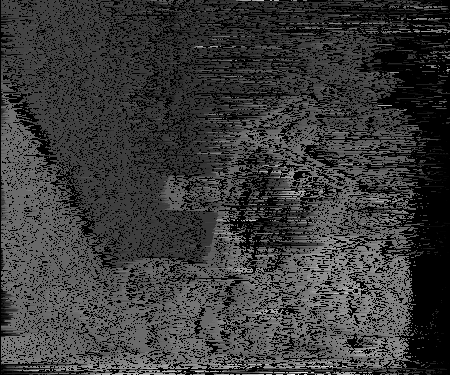

In [ ]:
left_map_3, right_map_3, graph_3 = calculate_overall_disparity(img3_left, img3_right)

cv2_imshow(left_map_3)
cv2_imshow(right_map_3)

In [ ]:
def plot_graph(graph_mat):
  index = []

  for i in range(graph.shape[0]):
   for j in range(graph.shape[1]):
      if graph[i, j] == 255:
        index.append([i, j])

  x_coords = [x[0] for x in index]
  y_coords = [y[1] for y in index]
  plt.plot(x_coords, y_coords, "k.", lw=0)


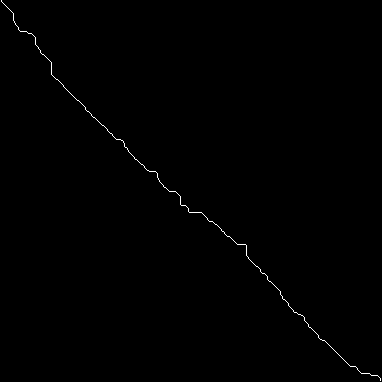

In [ ]:
cv2_imshow(graph)

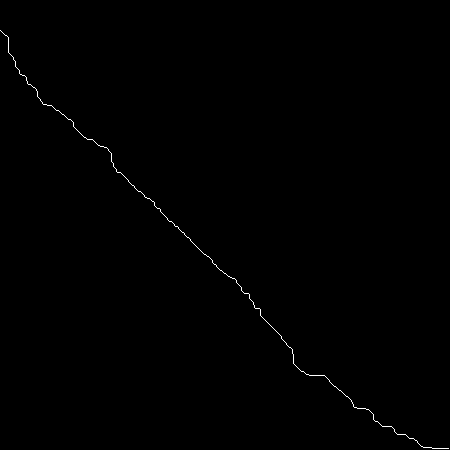

In [ ]:
cv2_imshow(graph_2)

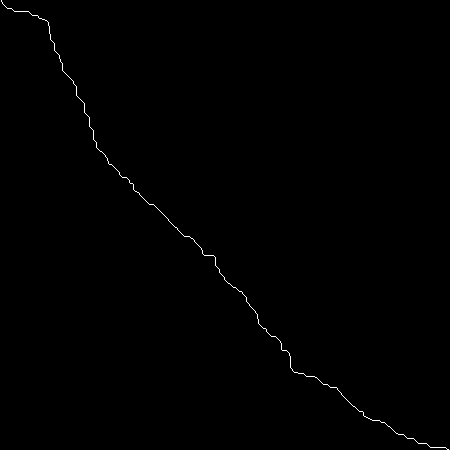

In [ ]:
cv2_imshow(graph_3)